# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#url=http://api.openweathermap.org/data/2.5/weather?appid=9e8ad36944a36af2b33e09daa8e352bb&units=metric&q=
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
lat= []
temp=[]
cityname=[]
humidity=[]
clouds=[]
windspeed=[]
country=[]
long=[]
date=[]
#Query URL
query_url= f"{url}appid={weather_api_key}&units={units}&q="
for city in cities[:700]:
    
    
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cityname.append(city)
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        print(city)
    except:
        print("city not found")
        pass
  


whyalla
thompson
vanimo
jamestown
arraial do cabo
ushuaia
rikitea
bredasdorp
bengkulu
atuona
codrington
city not found
kodiak
wajima
pitkyaranta
city not found
hilo
puerto escondido
lata
city not found
butaritari
bambanglipuro
punta arenas
chokurdakh
mataura
qaanaaq
atbasar
city not found
araci


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_dict= {
            "City": cityname,
            "Country":country,
            "Date":date,
            "Longitude":long,
            "Latitude":   lat,
            "Temperature": temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": windspeed
            
}
weather_data= pd.DataFrame(weather_dict)

weather_data.head(20)

,City,Country,Date,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,whyalla,AU,1619910581,137.5833,-33.0333,59.00,82,1,6.91
1,thompson,CA,1619910581,-97.8558,55.7435,23.00,86,90,9.22
2,vanimo,PG,1619910534,141.3028,-2.6741,80.98,80,71,4.61
3,jamestown,US,1619910581,-79.2353,42.0970,56.80,35,90,20.71
4,arraial do cabo,BR,1619910431,-42.0278,-22.9661,72.90,68,100,11.52
5,ushuaia,AR,1619910582,-68.3000,-54.8000,39.20,70,40,4.61
6,rikitea,PF,1619910582,-134.9692,-23.1203,75.60,80,91,7.45
7,bredasdorp,ZA,1619910434,20.0403,-34.5322,46.40,93,82,6.91
8,bengkulu,ID,1619910066,102.2655,-3.8004,75.16,87,67,4.21
9,atuona,PF,1619910078,-139.0333,-9.8000,79.21,69,2,6.31


In [42]:
weather_data.to_csv('citydatainfo.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature (5/1/21)')

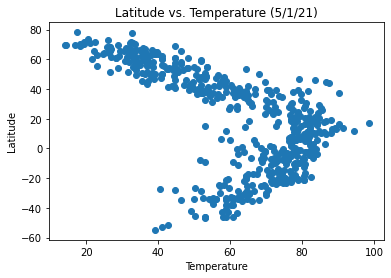

In [43]:
plt.scatter(weather_data["Temperature"],weather_data["Latitude"])
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (5/1/21)")

In [ ]:
#There seems to be a negative correlation between high latitudes and lower temperatures 

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity (5/1/21)')

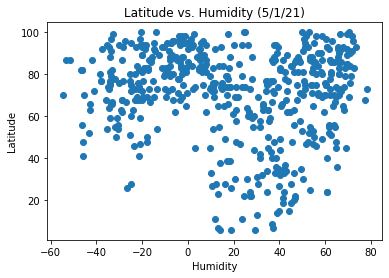

In [44]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity (5/1/21)")

In [ ]:
# There doesn't seem to be a correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness (5/1/21)')

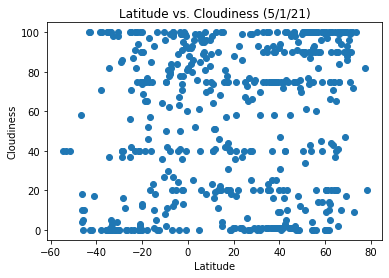

In [45]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (5/1/21)")

In [ ]:
#Latitude doesn't have an impact on how cloudy a city is. 

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed (5/1/21)')

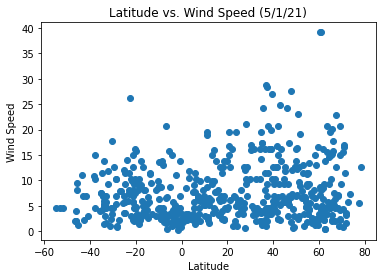

In [46]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (5/1/21)")

In [ ]:
#The majority of wind speed is under 15 MPH

## Linear Regression

In [33]:

def linear_hemisphere (x_values,y_values,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("latitude")
    plt.ylabel(title)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

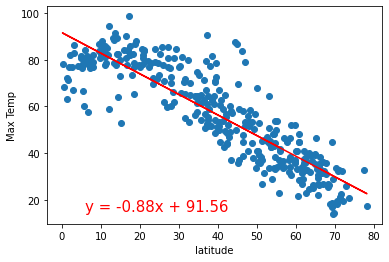

In [34]:
north_hemisphere_data= weather_data.loc[weather_data["Latitude"]>=0]
south_hemisphere_data=weather_data.loc[weather_data["Latitude"] <=0]
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Temperature"]
linear_hemisphere(x_values,y_values,"Max Temp",(6,15))

In [ ]:
#There is a negative correlation with max temp and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

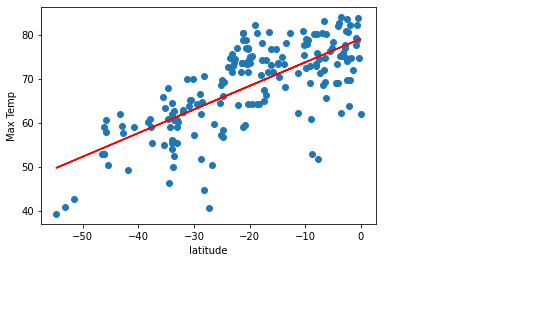

In [35]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Temperature"]
linear_hemisphere(x_values,y_values,"Max Temp", (6,15))

In [ ]:
#There is a positive correlation between latitude and max temp in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

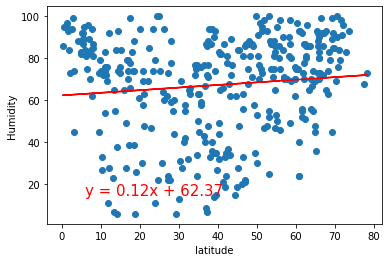

In [36]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Humidity"]
linear_hemisphere(x_values,y_values,"Humidity",(6,15))

In [ ]:
#THere is no seemingly obvious correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

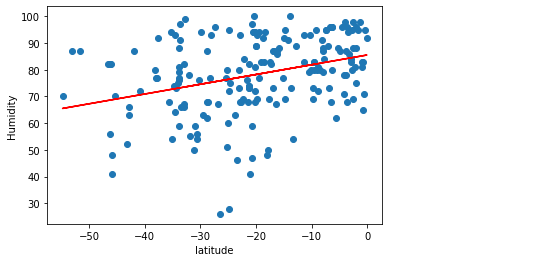

In [37]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Humidity"]
linear_hemisphere(x_values,y_values,"Humidity",(6,15))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

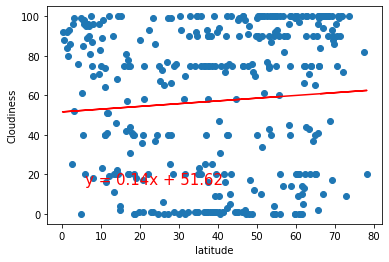

In [38]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Cloudiness"]
linear_hemisphere(x_values,y_values,"Cloudiness",(6,15))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

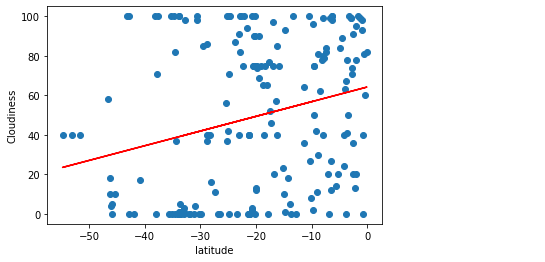

In [39]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Cloudiness"]
linear_hemisphere(x_values,y_values,"Cloudiness",(6,15))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

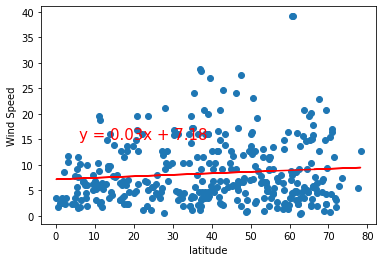

In [40]:
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Wind Speed"]
linear_hemisphere(x_values,y_values,"Wind Speed",(6,15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

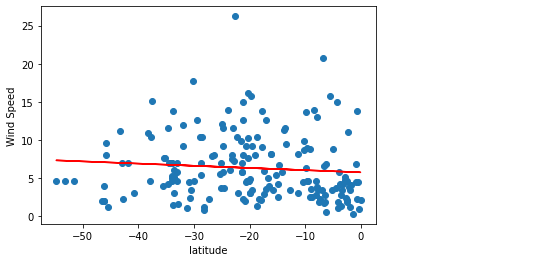

In [41]:
x_values=south_hemisphere_data["Latitude"]
y_values=south_hemisphere_data["Wind Speed"]
linear_hemisphere(x_values,y_values,"Wind Speed",(6,15))